In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import datetime as dt
from collections import Counter

## Utility Funstions


### 1. functions for plotting distributions:


In [ ]:
def plot_distribution( current_population, label_input, color_input= 'b'):
    fig = plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    plt.hist(current_population['price_median'].values,bins=20, color=color_input)
    plt.xlabel('Price median')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Median Price for ' + label_input )
    # plt.xlim([50,1400])
    #plt.xticks(np.linspace(0,700,25))

    plt.grid(False)
    plt.legend()

    plt.subplot(1,2,2)

    plt.hist(current_population['price_std'].values, bins=25, color=color_input)

    plt.xlabel('Std deviation')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Standard Deviation of Price for ' + label_input)

    plt.legend()
    plt.grid(False)
    print "Total element in "+label_input+": "+ str(len(current_population))
    print "Percent Listings with No Price Change at All for "+ label_input+": ", len(current_population[current_population['price_std']==0])*1./len(current_population)
    return

#Function for plotting population of continuous intervals, divided by ranges

def plot_interval(current_population,field, ranges, label_input ):
    #intervals=[]
    for i in range(len(ranges)-1):
        current_range= current_population[current_population[field].isin([ranges[i],ranges[i+1]] )]
        current_label= label_input + " range: [" +str(ranges[i])+","+str(ranges[i+1])+"]"
        plot_distribution(current_range,current_label )
    return


### 2. Acceptance Rate

In [193]:
def number_of(dataframe, field, field_value):
    auxiliar=dataframe.loc[dataframe[field]==field_value]
    return len(auxiliar)


#n accepted, n denied etc. depending on the kind of field

def acceptance_rate(field, types= None):
    if types == None:        
        types= complete_data[field].unique()
        print types
    complete_accepted_f = {}
    complete_denied_f={}
    complete_all_negative_f={}
    complete_not_answer_f={}

    for el in types:
        complete_accepted_f[el] = number_of (complete_accepted, field, el)
        complete_denied_f[el] = number_of (complete_denied, field, el)
        complete_all_negative_f[el] = number_of (complete_all_negative, field, el)
        complete_not_answer_f[el] = number_of (complete_not_answer, field, el)

    for el in types:
        try:
            print el, " % of replied: " + str(float(complete_accepted_f[el])/(complete_denied_f[el]+ complete_accepted_f[el]))
            print el, " % of contacted: " + str(float(complete_accepted_f[el])/(complete_all_negative_f[el]+ complete_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"
    result_dict= {"types": types, "accepted": complete_accepted_f, "denied": complete_denied_f,"not_answer":complete_not_answer_f,
                 "all_negative": complete_all_negative_f, "category": field}         
    return result_dict

            

def acceptance_rate_continuous(field, ranges):

    #types= round3_clean[field].unique()
    #print types
    complete_accepted_f = {}
    complete_denied_f={}
    complete_all_negative_f={}
    complete_not_answer_f={}

    for el in range(len(ranges)-1):        
        complete_accepted_f[el] = len(complete_accepted[complete_accepted[field].isin(range(ranges[el],ranges[el+1],1)) ])
        complete_denied_f[el] = len(complete_denied[complete_denied[field].isin(range(ranges[el],ranges[el+1],1)) ])
        complete_all_negative_f[el] = len(complete_all_negative[complete_all_negative[field].isin(range(ranges[el],ranges[el+1],1) ) ])
        complete_not_answer_f[el] = len(complete_not_answer[complete_not_answer[field].isin(range(ranges[el],ranges[el+1],1) )])
        
        

    for el in range(len(ranges)-1):
        current_label= field + " range: [" +str(ranges[el])+","+str(ranges[el+1])+"]"

        try:
            print  "[" +str(ranges[el])+","+str(ranges[el+1])+"]", " % of replied: " + str(float(complete_accepted_f[el])/(complete_denied_f[el]+ complete_accepted_f[el]))
            print  "[" +str(ranges[el])+","+str(ranges[el+1])+"]", " % of contacted: " + str(float(complete_accepted_f[el])/(complete_all_negative_f[el]+ complete_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"
            
    result_dict= {"ranges": ranges, "accepted": complete_accepted_f, "denied": complete_denied_f,"not_answer":complete_not_answer_f,
                 "all_negative": complete_all_negative_f, "category": field}         
    return result_dict


### 3. Percentage

In [3]:
import math

#standard error: sqrt(p*(1-p)/n) with p = positive/all 

def plot_percentage (percentage_dictionary, type_input, color= "g", error_size=float(0.5) ):
    p_replied= []
    p_all= []
    p_size= []
    p_size_answered= []
    #alphab = ['1 w', '2 w', 'More w']
    x_axis=[]
    p_std= []
    p_std_a= []
    if type_input == "categorical":
        print "categorical"
        for el in percentage_dictionary["types"]:
            try:
                repl=float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el])
                p_replied.append(repl)
                
                al=float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el])
                
                p_all.append(al )
                
                p_size_answered.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]))
                p_size.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]))
                #53(1 - 53/100))1/2
                p_std.append (math.sqrt(repl*(1-repl)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]) ) )
                                                                                    
                p_std_a.append (math.sqrt(al*(1-al)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]) )) 
                
                x_axis.append(el)
            except ZeroDivisionError:
                print "division by 0"        
    elif type_input == "continuous":
        for el in range(len(percentage_dictionary['ranges'])-1):
            current_label=  "[" +str(percentage_dictionary['ranges'][el])+","+str(percentage_dictionary['ranges'][el+1])+"]"            
            try:
                repl= float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el])
                p_replied.append(repl)
                al=float(percentage_dictionary['accepted'][el])/(float(percentage_dictionary['accepted'][el])+percentage_dictionary['all_negative'][el])                                                              
                p_all.append(al)
                p_size_answered.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]))               
                p_size.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]))
                p_std.append (math.sqrt(repl*(1-repl)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]) ) )
                                                                                    
                p_std_a.append (math.sqrt(al*(1-al)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]) )) 
                
                x_axis.append(current_label)
            except ZeroDivisionError:
                print "division by 0"                
    else:
        print "invalid type"
        return

    
    plt.subplot(1,2,1)
    
    pos = np.arange(len(x_axis))
    print np.arange(len(x_axis))
    print "AMONG REPLIED HOSTS"
    print "percentage:"
    print p_replied
    print "size"
    print p_size_answered
    print "std error:"
    print p_std_a
    print "\n"
    print "AMONG ALL CONTACTED HOSTS"

    print "percentage:"
    print p_all
    print "size"
    print p_size
    print "std error:"    
    print p_std
    print "average over all replied "+ str(np.mean(p_replied))
    print "average over all contacted "+ str(np.mean(p_all))
    
    width = 0.7     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    x_axis2= x_axis
    for idx, val in enumerate(x_axis):
        x_axis[idx]=str(x_axis[idx])+"\n"+str(p_size_answered[idx])
    ax.set_xticklabels(x_axis)
    
    plt.xlabel(percentage_dictionary['category'])
    plt.ylabel('Acceptance rate (%)')
    plt.title('Acceptance among the hosts who replied')
    
    '''
    plt.text(pos + (width / 2), 1.05*pos,
                '%d' % len(),
                ha='center', va='bottom')
    '''
    #, yerr=[int(i)/400 for i in p_size_answered]
    
    plt.bar(pos, p_replied, width, color =color,yerr=[i/error_size for i in p_std])
    
    ####################################quantity
    #rects1 = ax.bar(pos, p_replied, width, color = color)
    #autolabel(rects1)
    
    plt.show()
    plt.subplot(1,2,2)
    
    pos = np.arange(len(x_axis))
    width = 0.7     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    
    for idx, val in enumerate(x_axis):
        x_axis2[idx]= str(x_axis2[idx])+"\n"+str(p_size[idx])
    ax.set_xticklabels(x_axis2)
    
    plt.xlabel(percentage_dictionary['category'])
    plt.ylabel('Acceptance rate (%)')
    plt.title('Acceptance among all the hosts')

    #,yerr=[int(i)/491 for i in p_size]
    plt.bar(pos, p_all, width, color= color, yerr=[ i/error_size for i in p_std_a] )
    plt.show()
   

## Loading Data

In [5]:
fields_ = ["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]

In [19]:
round2 = pd.read_json("../data/analytics_merge/round2_merged.json")
round2_clean = round2[fields]
round3 = pd.read_json("../data/analytics_merge/round3_merged.json")
round3_clean = round3[fields]
round4 = pd.read_json("../data/analytics_merge/round4_merged.json")
round4['discount_agreed'] = round4['discount']
round4_clean = round4[fields]
round5 = pd.read_json("../data/analytics_merge/round5_merged.json")
round5_clean = round5[fields]

dataframes= [round2_clean, round3_clean, round4_clean, round5_clean]

complete_data = pd.concat(dataframes)
print len(complete_data)

1074


In [20]:
complete_listings = pd.read_csv('../data/listings/nyc_listings.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
complete_listings.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'thumbnail_url',
       u'medium_url', u'picture_url', u'xl_picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u

# ***NOTE: do not have other calendar data, need to rerun this part

In [37]:
# #compute price median and price_std
calendar_price =  np.array([(np.median(calendar["price_USD"].values()), np.std(calendar["price_USD"].values())) 
                            for calendar in round3_clean["calendars"].values])
calendar_median_price = calendar_price[:,0]
calendar_price_std = calendar_price[:,1]

In [39]:
# complete_data["price_median"]=calendar_median_price
# complete_data["price_std"]=calendar_price_std/calendar_median_price
#cleaning
for index, row in complete_data.iterrows():
    elem = str(row["host_acceptance_rate"])
    try:
        complete_data["host_acceptance_rate"][index]= int( elem[:-1]) 
    except:
        complete_data["host_acceptance_rate"][index]= int(-1) 
    
    elem2 = str(row["host_response_rate"])    
    try:
        complete_data["host_response_rate"][index]= int( elem2[:-1]) 
    except:
        complete_data["host_response_rate"][index]= int(-1) 
    
    #not used
    elem3 = str(row["monthly_price"])
    try:
        complete_data["monthly_price"][index]= int( elem3[1:]) 
    except:
        complete_data["monthly_price"][index]= int(-1) 
    
    #not used
    #round3_clean["nightly_price"][index] = int(row[nightly_price])

    if row["host_is_superhost"] == "t":
        complete_data["host_is_superhost"][index] = 1
    if row["host_is_superhost"] == "f":
        complete_data["host_is_superhost"][index] = 0
    
    if row["room_type"]==  "Private room":
        complete_data["room_type"][index] = 1
    elif row["room_type"]=="Entire home/apt":
        complete_data["room_type"][index] = 0
    else:
        complete_data["room_type"][index] = 2

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [44]:
complete_accepted= complete_data
complete_denied= complete_data
complete_not_answer= complete_data

complete_accepted= complete_accepted.loc[complete_accepted['decision']==1]
complete_denied= complete_denied.loc[complete_denied['decision']==0]
complete_not_answer= complete_not_answer.loc[complete_not_answer['decision']==-1]
complete_all_negative= pd.concat([complete_denied, complete_not_answer])


print len(complete_accepted)
print len(complete_denied)
print len(complete_not_answer)
print len(complete_all_negative)
print len(complete_data)

233
299
541
840
1074


# Data analytics 

### 1. Price distribution

### all properties in NYC

In [70]:
price =[float(i[1:].replace(",","")) for i in complete_listings['price']]

In [71]:
price.sort(reverse=True)

In [75]:
price[:150]

[8000.0,
 6500.0,
 6001.0,
 5999.0,
 5200.0,
 5000.0,
 5000.0,
 5000.0,
 5000.0,
 4500.0,
 4000.0,
 3750.0,
 3300.0,
 3000.0,
 3000.0,
 2750.0,
 2750.0,
 2700.0,
 2620.0,
 2600.0,
 2500.0,
 2500.0,
 2500.0,
 2500.0,
 2500.0,
 2500.0,
 2400.0,
 2400.0,
 2400.0,
 2350.0,
 2250.0,
 2200.0,
 2100.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 1999.0,
 1999.0,
 1900.0,
 1800.0,
 1800.0,
 1800.0,
 1800.0,
 1750.0,
 1750.0,
 1700.0,
 1700.0,
 1650.0,
 1600.0,
 1600.0,
 1600.0,
 1559.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1499.0,
 1495.0,
 1450.0,
 1368.0,
 1350.0,
 1300.0,
 1300.0,
 1300.0,
 1250.0,
 1225.0,
 1211.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

### note: too much outiers, start ploting from the 150 highest..

(array([  2.84100000e+03,   9.82200000e+03,   8.03600000e+03,
          5.16400000e+03,   4.19300000e+03,   1.45900000e+03,
          1.53400000e+03,   9.77000000e+02,   4.07000000e+02,
          4.04000000e+02,   9.00000000e+01,   1.77000000e+02,
          2.05000000e+02,   7.70000000e+01,   1.18000000e+02,
          1.30000000e+01,   5.20000000e+01,   6.60000000e+01,
          3.40000000e+01,   4.30000000e+01,   3.00000000e+00,
          1.80000000e+01,   2.90000000e+01,   1.10000000e+01,
          5.90000000e+01,   0.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   1.00000000e+01,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.20000000e+01,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

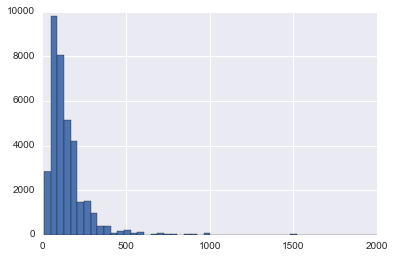

In [85]:
plt.hist(price[50:], bins=50)

### properties in Our sample

(array([  83.,  302.,  199.,  180.,  114.,   74.,   42.,   25.,   16.,
           7.,   12.,    3.,    4.,    1.,    2.,    2.,    1.,    2.,
           1.,    0.,    1.,    1.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   10. ,    55.8,   101.6,   147.4,   193.2,   239. ,   284.8,
          330.6,   376.4,   422.2,   468. ,   513.8,   559.6,   605.4,
          651.2,   697. ,   742.8,   788.6,   834.4,   880.2,   926. ,
          971.8,  1017.6,  1063.4,  1109.2,  1155. ,  1200.8,  1246.6,
         1292.4,  1338.2,  1384. ,  1429.8,  1475.6,  1521.4,  1567.2,
         1613. ,  1658.8,  1704.6,  1750.4,  1796.2,  1842. ,  1887.8,
         1933.6,  1979.4,  2025.2,  2071. ,  2116.8,  2162.6,  2208.4,
         2254.2,  2300. ]),
 <a list of 50 Patch objects>)

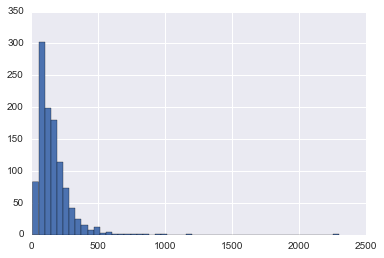

In [80]:
plt.hist(complete_data.nightly_price, bins = 50)

## Features -- Negotiation Acceptance Rate

## Acceptance Rate -- Price

In [132]:
acc_price = acceptance_rate_continuous('nightly_price', range(0,800,50))

[0,50]  % of replied: 0.307692307692
[0,50]  % of contacted: 0.173913043478
[50,100]  % of replied: 0.380281690141
[50,100]  % of contacted: 0.192857142857
[100,150]  % of replied: 0.443396226415
[100,150]  % of contacted: 0.211711711712
[150,200]  % of replied: 0.46835443038
[150,200]  % of contacted: 0.204419889503
[200,250]  % of replied: 0.462962962963
[200,250]  % of contacted: 0.25
[250,300]  % of replied: 0.5
[250,300]  % of contacted: 0.258620689655
[300,350]  % of replied: 0.368421052632
[300,350]  % of contacted: 0.25
[350,400]  % of replied: 0.625
[350,400]  % of contacted: 0.227272727273
[400,450]  % of replied: 0.75
[400,450]  % of contacted: 0.375
[450,500]  % of replied: 0.333333333333
[450,500]  % of contacted: 0.166666666667
[500,550]  % of replied: 0.0
[500,550]  % of contacted: 0.0
[550,600]  % of replied: 1.0
[550,600]  % of contacted: 0.5
[600,650]  % of replied: 1.0
[600,650]  % of contacted: 1.0
[650,700] division by 0
[700,750]  % of replied: 1.0
[700,750]  % of

In [133]:
acc_price

{'accepted': {0: 8,
  1: 54,
  2: 47,
  3: 37,
  4: 25,
  5: 15,
  6: 7,
  7: 5,
  8: 3,
  9: 2,
  10: 0,
  11: 1,
  12: 1,
  13: 0,
  14: 1},
 'all_negative': {0: 38,
  1: 226,
  2: 175,
  3: 144,
  4: 75,
  5: 43,
  6: 21,
  7: 17,
  8: 5,
  9: 10,
  10: 5,
  11: 1,
  12: 0,
  13: 2,
  14: 0},
 'category': 'nightly_price',
 'denied': {0: 18,
  1: 88,
  2: 59,
  3: 42,
  4: 29,
  5: 15,
  6: 12,
  7: 3,
  8: 1,
  9: 4,
  10: 2,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 'not_answer': {0: 20,
  1: 138,
  2: 116,
  3: 102,
  4: 46,
  5: 28,
  6: 9,
  7: 14,
  8: 4,
  9: 6,
  10: 3,
  11: 1,
  12: 0,
  13: 2,
  14: 0},
 'ranges': [0,
  50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750]}

division by 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
AMONG REPLIED HOSTS
percentage:
[0.3076923076923077, 0.38028169014084506, 0.44339622641509435, 0.46835443037974683, 0.46296296296296297, 0.5, 0.3684210526315789, 0.625, 0.75, 0.3333333333333333, 0.0, 1.0, 1.0, 1.0]
size
['26', '142', '106', '79', '54', '30', '19', '8', '4', '6', '2', '1', '1', '1']
std error:
[0.05588561625366534, 0.02357838487335703, 0.02741817169141735, 0.0299753488294957, 0.04330127018922193, 0.05749603112801239, 0.08183170883849714, 0.08934606739851096, 0.1711632992203644, 0.10758287072798381, 0.0, 0.3535533905932738, 0.0, 0.0]


AMONG ALL CONTACTED HOSTS
percentage:
[0.17391304347826086, 0.19285714285714287, 0.21171171171171171, 0.20441988950276244, 0.25, 0.25862068965517243, 0.25, 0.22727272727272727, 0.375, 0.16666666666666666, 0.0, 0.5, 1.0, 1.0]
size
['46', '280', '222', '181', '100', '58', '28', '22', '8', '12', '5', '2', '1', '1']
std error:
[0.09051513929454648, 0.04073856240458203, 0.048252090854682

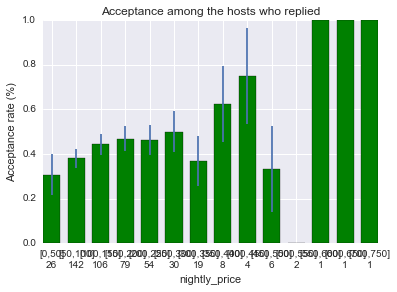

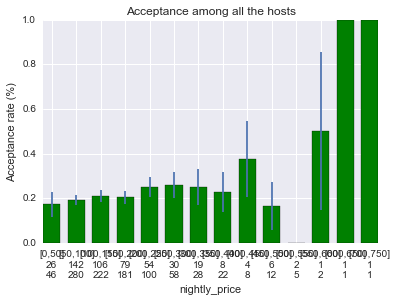

In [134]:
size= float(0.2)
plot_percentage(acc_price, "continuous", "g", 1)

## Acceptance Rate -- Number of Reviews

In [135]:
acc_review= acceptance_rate_continuous('number_of_reviews', range(0,200,20))

[0,20]  % of replied: 0.413043478261
[0,20]  % of contacted: 0.181240063593
[20,40]  % of replied: 0.479166666667
[20,40]  % of contacted: 0.261363636364
[40,60]  % of replied: 0.431034482759
[40,60]  % of contacted: 0.255102040816
[60,80]  % of replied: 0.451612903226
[60,80]  % of contacted: 0.245614035088
[80,100]  % of replied: 0.454545454545
[80,100]  % of contacted: 0.31914893617
[100,120]  % of replied: 0.4
[100,120]  % of contacted: 0.206896551724
[120,140]  % of replied: 0.615384615385
[120,140]  % of contacted: 0.421052631579
[140,160]  % of replied: 0.333333333333
[140,160]  % of contacted: 0.2
[160,180]  % of replied: 0.333333333333
[160,180]  % of contacted: 0.142857142857


In [136]:
acc_review

{'accepted': {0: 114, 1: 46, 2: 25, 3: 14, 4: 15, 5: 6, 6: 8, 7: 1, 8: 1},
 'all_negative': {0: 515,
  1: 130,
  2: 73,
  3: 43,
  4: 32,
  5: 23,
  6: 11,
  7: 4,
  8: 6},
 'category': 'number_of_reviews',
 'denied': {0: 162, 1: 50, 2: 33, 3: 17, 4: 18, 5: 9, 6: 5, 7: 2, 8: 2},
 'not_answer': {0: 353, 1: 80, 2: 40, 3: 26, 4: 14, 5: 14, 6: 6, 7: 2, 8: 4},
 'ranges': [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]}

[0 1 2 3 4 5 6 7 8]
AMONG REPLIED HOSTS
percentage:
[0.41304347826086957, 0.4791666666666667, 0.43103448275862066, 0.45161290322580644, 0.45454545454545453, 0.4, 0.6153846153846154, 0.3333333333333333, 0.3333333333333333]
size
['276', '96', '58', '31', '33', '15', '13', '3', '3']
std error:
[0.015359605878839222, 0.03311933364489529, 0.04403442410202104, 0.05701458429234497, 0.06799450739889032, 0.07522159645153251, 0.1132689656524148, 0.1788854381999832, 0.13226001425322165]


AMONG ALL CONTACTED HOSTS
percentage:
[0.18124006359300476, 0.26136363636363635, 0.25510204081632654, 0.24561403508771928, 0.3191489361702128, 0.20689655172413793, 0.42105263157894735, 0.2, 0.14285714285714285]
size
['629', '176', '98', '57', '47', '29', '19', '5', '7']
std error:
[0.029637823667816924, 0.05098671929023754, 0.06502569219449274, 0.08938114993337111, 0.08667841720414475, 0.12649110640673517, 0.1349320029703122, 0.2721655269759087, 0.2721655269759087]
average over all replied 0.434606029723
average

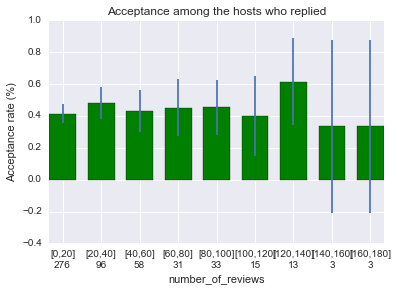

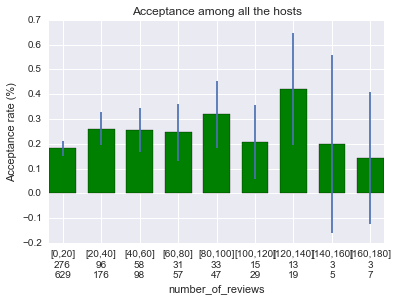

In [137]:
plot_percentage(acc_review, "continuous")

## Acceptance Rate -- Discount Asked

In [139]:
acc_discount= acceptance_rate("discount_asked")

[ 0.8  0.9  0.7  0.6]
Category: discount_asked  type: 0.8 percentage over all replied: 0.489361702128
Category: discount_asked  type: 0.8 percentage over all contacted: 0.250909090909
Category: discount_asked  type: 0.9 percentage over all replied: 0.491935483871
Category: discount_asked  type: 0.9 percentage over all contacted: 0.237354085603
Category: discount_asked  type: 0.7 percentage over all replied: 0.426470588235
Category: discount_asked  type: 0.7 percentage over all contacted: 0.211678832117
Category: discount_asked  type: 0.6 percentage over all replied: 0.343511450382
Category: discount_asked  type: 0.6 percentage over all contacted: 0.168539325843


categorical
[0 1 2 3]
AMONG REPLIED HOSTS
percentage:
[0.48936170212765956, 0.49193548387096775, 0.4264705882352941, 0.3435114503816794]
size
['141', '124', '136', '131']
std error:
[0.026143222240591568, 0.026539532487079992, 0.02467828799490245, 0.02290951272638174]


AMONG ALL CONTACTED HOSTS
percentage:
[0.2509090909090909, 0.23735408560311283, 0.2116788321167883, 0.16853932584269662]
size
['275', '257', '274', '267']
std error:
[0.04209806405636096, 0.044895484683838874, 0.042408502338905384, 0.04149048762851023]
average over all replied 0.437819806154
average over all contacted 0.217120333618


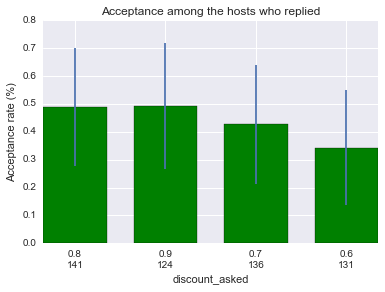

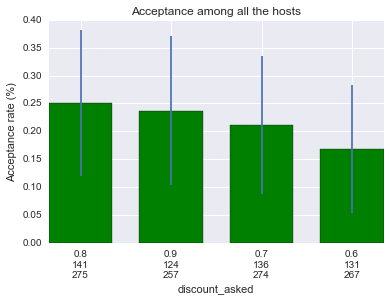

In [140]:
plot_percentage(acc_discount, "categorical","g",size)

## Acceptance Rate -- Weeks in Advance

### NOTE: We should group the data together by weeks in advance on number of orphan's days, so that we only study the impact of weeks in advance

In [176]:
complete_data.bucket_name.unique()

array([u'days3_weeksM', u'days3_weeks1', u'daysM_weeksM', u'days1_weeks1',
       u'days2_weeksM', u'daysM_weeks2', u'days2_weeks2', u'daysM_weeks1',
       u'days3_weeks2', u'days1_weeksM', u'days2_weeks1', u'days1_weeks2'], dtype=object)

In [194]:
acc_w_advance_1 = acceptance_rate('bucket_name', ["days1_weeks1","days1_weeks2","days1_weeksM"])
acc_w_advance_2 = acceptance_rate('bucket_name', ["days2_weeks1","days2_weeks2","days2_weeksM"])
acc_w_advance_3 = acceptance_rate('bucket_name', ["days3_weeks1","days3_weeks2","days3_weeksM"])
acc_w_advance_m = acceptance_rate('bucket_name', ["daysM_weeks1","daysM_weeks2","daysM_weeksM"])

days1_weeks1  % of replied: 0.228571428571
days1_weeks1  % of contacted: 0.0898876404494
days1_weeks2  % of replied: 0.466666666667
days1_weeks2  % of contacted: 0.238636363636
days1_weeksM  % of replied: 0.386363636364
days1_weeksM  % of contacted: 0.186813186813
days2_weeks1  % of replied: 0.468085106383
days2_weeks1  % of contacted: 0.255813953488
days2_weeks2  % of replied: 0.555555555556
days2_weeks2  % of contacted: 0.280898876404
days2_weeksM  % of replied: 0.428571428571
days2_weeksM  % of contacted: 0.258064516129
days3_weeks1  % of replied: 0.5
days3_weeks1  % of contacted: 0.228260869565
days3_weeks2  % of replied: 0.514285714286
days3_weeks2  % of contacted: 0.209302325581
days3_weeksM  % of replied: 0.423076923077
days3_weeksM  % of contacted: 0.241758241758
daysM_weeks1  % of replied: 0.432432432432
daysM_weeks1  % of contacted: 0.179775280899
daysM_weeks2  % of replied: 0.434782608696
daysM_weeks2  % of contacted: 0.227272727273
daysM_weeksM  % of replied: 0.395833333333

In [195]:
print acc_w_advance_1
print acc_w_advance_2
print acc_w_advance_3
print acc_w_advance_m

{'category': 'bucket_name', 'types': ['days1_weeks1', 'days1_weeks2', 'days1_weeksM'], 'denied': {'days1_weeksM': 27, 'days1_weeks1': 27, 'days1_weeks2': 24}, 'accepted': {'days1_weeksM': 17, 'days1_weeks1': 8, 'days1_weeks2': 21}, 'all_negative': {'days1_weeksM': 74, 'days1_weeks1': 81, 'days1_weeks2': 67}, 'not_answer': {'days1_weeksM': 47, 'days1_weeks1': 54, 'days1_weeks2': 43}}
{'category': 'bucket_name', 'types': ['days2_weeks1', 'days2_weeks2', 'days2_weeksM'], 'denied': {'days2_weeksM': 32, 'days2_weeks1': 25, 'days2_weeks2': 20}, 'accepted': {'days2_weeksM': 24, 'days2_weeks1': 22, 'days2_weeks2': 25}, 'all_negative': {'days2_weeksM': 69, 'days2_weeks1': 64, 'days2_weeks2': 64}, 'not_answer': {'days2_weeksM': 37, 'days2_weeks1': 39, 'days2_weeks2': 44}}
{'category': 'bucket_name', 'types': ['days3_weeks1', 'days3_weeks2', 'days3_weeksM'], 'denied': {'days3_weeksM': 30, 'days3_weeks2': 17, 'days3_weeks1': 21}, 'accepted': {'days3_weeksM': 22, 'days3_weeks2': 18, 'days3_weeks1':

## Acceptance Rate-- Orphan's days

### NOTE: We should group the data together by orphan days on weeks in advance, so that we only study the impact of  orphan day

In [196]:
acc_oph_1 = acceptance_rate('bucket_name', ["days1_weeks1","days2_weeks1","days3_weeks1", "daysM_weeks1"])
acc_oph_2 = acceptance_rate('bucket_name', ["days1_weeks2","days2_weeks2","days3_weeks2", "daysM_weeks2"])
acc_oph_3 = acceptance_rate('bucket_name', ["days1_weeks3","days2_weeks3","days3_weeks3", "daysM_weeks3"])

days1_weeks1  % of replied: 0.228571428571
days1_weeks1  % of contacted: 0.0898876404494
days2_weeks1  % of replied: 0.468085106383
days2_weeks1  % of contacted: 0.255813953488
days3_weeks1  % of replied: 0.5
days3_weeks1  % of contacted: 0.228260869565
daysM_weeks1  % of replied: 0.432432432432
daysM_weeks1  % of contacted: 0.179775280899
days1_weeks2  % of replied: 0.466666666667
days1_weeks2  % of contacted: 0.238636363636
days2_weeks2  % of replied: 0.555555555556
days2_weeks2  % of contacted: 0.280898876404
days3_weeks2  % of replied: 0.514285714286
days3_weeks2  % of contacted: 0.209302325581
daysM_weeks2  % of replied: 0.434782608696
daysM_weeks2  % of contacted: 0.227272727273
days1_weeks3 division by 0
days2_weeks3 division by 0
days3_weeks3 division by 0
daysM_weeks3 division by 0


In [198]:
print acc_oph_1, 
print acc_oph_2, 
print acc_oph_3

{'category': 'bucket_name', 'types': ['days1_weeks1', 'days2_weeks1', 'days3_weeks1', 'daysM_weeks1'], 'denied': {'daysM_weeks1': 21, 'days2_weeks1': 25, 'days1_weeks1': 27, 'days3_weeks1': 21}, 'accepted': {'daysM_weeks1': 16, 'days2_weeks1': 22, 'days1_weeks1': 8, 'days3_weeks1': 21}, 'all_negative': {'daysM_weeks1': 73, 'days2_weeks1': 64, 'days1_weeks1': 81, 'days3_weeks1': 71}, 'not_answer': {'daysM_weeks1': 52, 'days2_weeks1': 39, 'days1_weeks1': 54, 'days3_weeks1': 50}} {'category': 'bucket_name', 'types': ['days1_weeks2', 'days2_weeks2', 'days3_weeks2', 'daysM_weeks2'], 'denied': {'daysM_weeks2': 26, 'days3_weeks2': 17, 'days1_weeks2': 24, 'days2_weeks2': 20}, 'accepted': {'daysM_weeks2': 20, 'days3_weeks2': 18, 'days1_weeks2': 21, 'days2_weeks2': 25}, 'all_negative': {'daysM_weeks2': 68, 'days3_weeks2': 68, 'days1_weeks2': 67, 'days2_weeks2': 64}, 'not_answer': {'daysM_weeks2': 42, 'days3_weeks2': 51, 'days1_weeks2': 43, 'days2_weeks2': 44}} {'category': 'bucket_name', 'types'